In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score



In [2]:
# 1 Understanding the data
df_Wine=pd.read_csv('winequality-red.csv')
df_Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste_category,price_range,taste_value,color_category,color_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Sour,Low,1,Light,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Sour,Low,1,Light,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Sour,Low,1,Light,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Sour,Low,1,Medium,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Sour,Low,1,Medium,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Sour,Low,1,Medium,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Sour,Low,1,Medium,2


In [3]:
# import pandas as pd

# # Define a function to calculate the total value and categorize the taste of the wine
# def categorize_taste(row):
#     total_value = row['residual sugar'] - row['citric acid'] - row['chlorides']
#     if total_value > 10:
#         return "Sweet"
#     elif total_value < 3:
#         return "Sour"
#     else:
#         return "SemiSweet"

# # Apply the function to create the new column
# df_Wine['taste_category'] = df_Wine.apply(categorize_taste, axis=1)

# # Overwrite the existing CSV file with the updated DataFrame
# file_path = 'winequality-red.csv'
# df_Wine.to_csv(file_path, index=False)



In [4]:
# import pandas as pd

# # Sample data, assuming you have a DataFrame `df_Wine` with 'taste_category' already assigned
# # df_Wine = pd.read_csv('winequality-red.csv')

# # Create a mapping for the taste categories to numerical values
# taste_map = {
#     "Sour": 1,#sour
#     "SemiSweet": 2,
#     "Sweet": 3,
# }

# # Create the 'taste_value' column using the mapping
# df_Wine['taste_value'] = df_Wine['taste_category'].map(taste_map)

# # Save the updated DataFrame to the CSV file
# file_path = 'winequality-red.csv'
# df_Wine.to_csv(file_path, index=False)


In [5]:
df_Wine.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste_category,price_range,taste_value,color_category,color_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Sour,Low,1,Light,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Sour,Low,1,Light,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Sour,Low,1,Light,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6,Sour,Low,1,Medium,2
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5,Sour,Low,1,Medium,2
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5,Sour,Low,1,Light,1
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5,Sour,Low,1,Medium,2


In [6]:
# import pandas as pd

# # Assuming df_Wine is your DataFrame with the necessary columns
# # Define thresholds for quality and alcohol content (with inclusive ranges)
# quality_thresholds = [(3, 4), (5, 6), (7, 8)]
# alcohol_thresholds = [(8.4, 9.7), (9.8, 11.5), (11.6, 14.9)]

# # Define price ranges corresponding to quality and alcohol content
# # Price ranges could be 'Low', 'Medium', 'High'
# price_ranges = ['Low', 'Medium', 'High']

# # Function to categorize wines based on quality and alcohol content
# def categorize_price(row):
#     # Iterate over the quality and alcohol thresholds
#     for i, (q_min, q_max) in enumerate(quality_thresholds):
#         for j, (a_min, a_max) in enumerate(alcohol_thresholds):
#             if q_min <= row['quality'] <= q_max and a_min <= row['alcohol']:
#                 return price_ranges[j]

# # Apply the function to create the new column
# df_Wine['price_range'] = df_Wine.apply(categorize_price, axis=1)

# # Overwrite the existing CSV file with the updated DataFrame
# df_Wine.to_csv('existing_file.csv', index=False)

# print("Data has been saved to the file 'existing_file.csv'")


In [7]:
# import pandas as pd

# # Load the CSV file
# # df_Wine = pd.read_csv('existing_file.csv')

# # Define a mapping for the price range to numerical values
# price_value_map = {
#     'Low': 1,
#     'Medium': 2,
#     'High': 3,
# }

# # Create the 'price_value' column using the mapping
# df_Wine['price_value'] = df_Wine['price_range'].map(price_value_map)

# # Save the updated DataFrame to the CSV file
# file_path = 'existing_file.csv'
# df_Wine.to_csv(file_path, index=False)

# print("Data has been saved to the file 'existing_file.csv'")


In [8]:
df_Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste_category,price_range,taste_value,color_category,color_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Sour,Low,1,Light,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Sour,Low,1,Light,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Sour,Low,1,Light,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Sour,Low,1,Medium,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Sour,Low,1,Medium,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Sour,Low,1,Medium,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Sour,Low,1,Medium,2


In [9]:
df_Wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste_value,color_value
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.117573,1.384615
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342902,0.489221
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,3.000000,3.000000


- Alcohol. Wine generally contains between 5–15% of alcohols.
- Acids give the distinct sourness that makes wine.
- Wines that lack fixed acidity is considered as flat or flabby(the acids that naturally occur in the grapes used to ferment the wine and carry over into the wine (the fixed acid).)
- Two, the acid that arises as a result of the fermentation process of yeast or bacteria (volatile acid), ‘Volatile acids’ are acids that evaporate at low temperatures. ‘Volatile acids’ are acids that evaporate at low temperatures.
- citric acid. Citric acid is used as an acid supplement which boosts the acidity of the wine.
- The amount of sugar left after yeast ferments the wine is called residual sugar. Unsurprisingly, the higher the residual sugar, the sweeter the wine tastes. On the other end of the spectrum, a wine that does not taste sweet is considered as *dry*.
- preservative for wine-Sulfur compounds.These sulfur compounds can be further divided into the following:free sulfur dioxide=the higher the free sulfur dioxide content, the stronger the preservative effect. When added in larger quantities and in smaller batches, a greater free SO2 concentration is achieved
- fixed sulfur dioxide.=Free SO2 binds strongly to microorganisms in wine, creating fixed SO2. If a wine has high fixed SO2 content, it might mean that oxidation or microbial spoilage has happened
- The amount of chloride salts present in the wine. This varies among wine produced from different geographic, geologic and climatic conditions. For instance, wines that are produced in vineyards near the sea have higher chlorides than those produced far away from the sea.


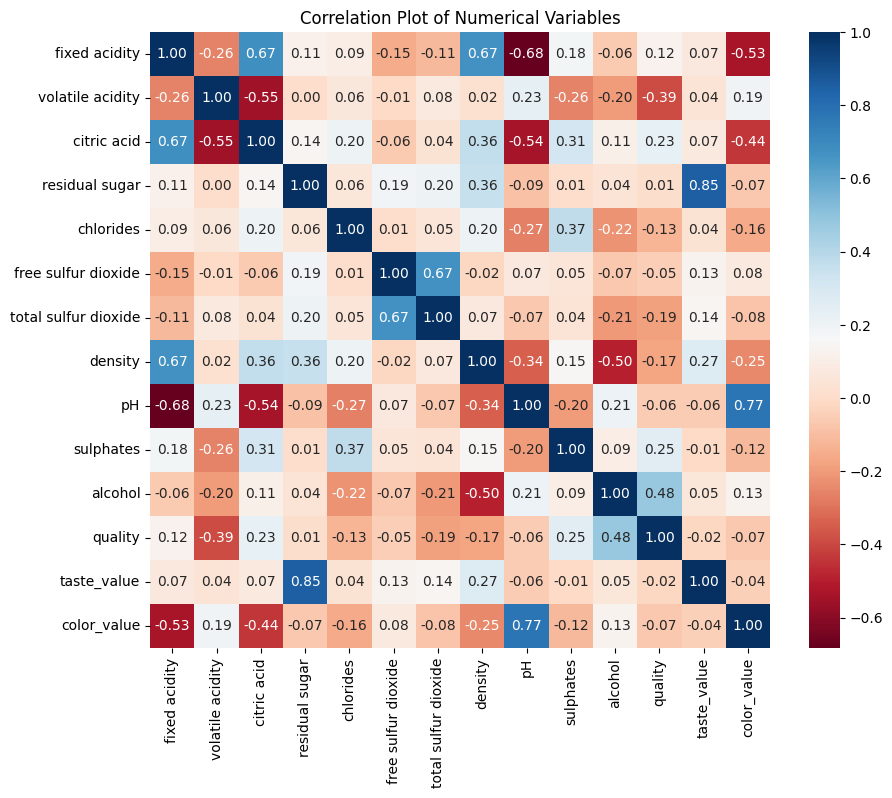

In [10]:
# Heatmap
# correlation
# To understand the relation between each columns
numerical_columns = df_Wine.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Plot of Numerical Variables')
plt.show()

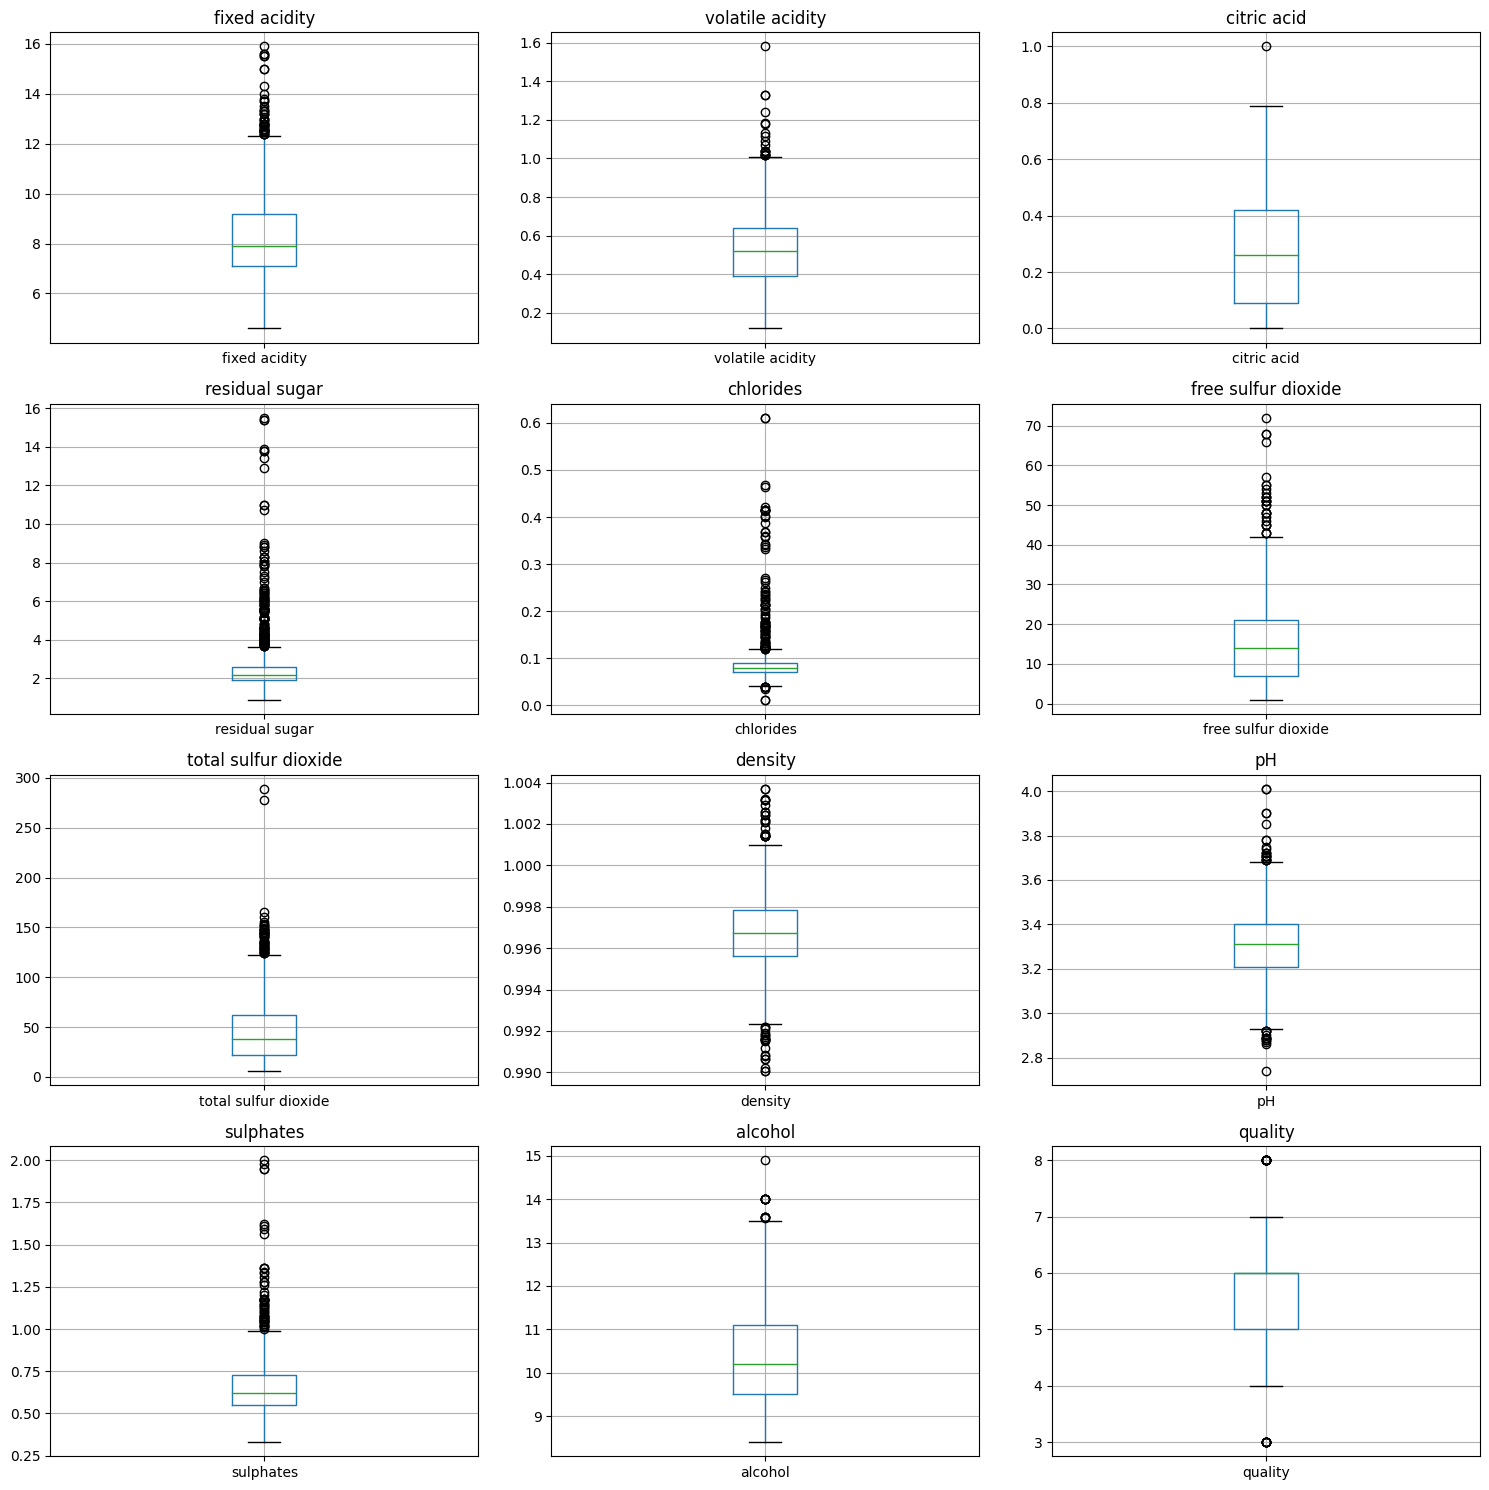

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df

# Selecting columns for box plots
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
           'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Creating subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Iterating over columns and plotting box plots
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    df_Wine.boxplot(column=column, ax=ax)
    ax.set_title(column)

# Adjusting layout
plt.tight_layout()
plt.show()


In [12]:
#df_Wine_numeric

In [13]:
df_Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste_category,price_range,taste_value,color_category,color_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Sour,Low,1,Light,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Sour,Low,1,Light,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Sour,Low,1,Light,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Sour,Low,1,Medium,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Sour,Low,1,Medium,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Sour,Low,1,Medium,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Sour,Low,1,Medium,2


In [14]:
Percentage_missing=df_Wine.isnull().sum()*100/len(df_Wine)
Percentage_missing

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
taste_category          0.0
price_range             0.0
taste_value             0.0
color_category          0.0
color_value             0.0
dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

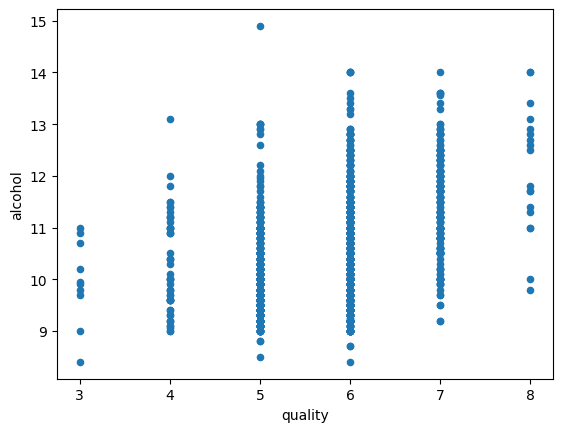

In [15]:
df_Wine.plot.scatter("quality", "alcohol")

In [16]:
df_Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste_category,price_range,taste_value,color_category,color_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Sour,Low,1,Light,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Sour,Low,1,Light,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Sour,Low,1,Light,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sour,Low,1,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Sour,Low,1,Medium,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Sour,Low,1,Medium,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Sour,Low,1,Medium,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Sour,Low,1,Medium,2


In [17]:
# # Check for non-numeric columns and null values
# print("Column Data Types:\n", df_Wine.dtypes)
# print("Null Values Count:\n", df_Wine.isnull().sum())

# # If you have non-numeric columns, you can drop them before computing the correlation matrix
# numeric_df = df_Wine.select_dtypes(include=[np.number])

# # Handle NaN values if needed
# # Example: drop rows with NaN values
# numeric_df.dropna(inplace=True)

# # Compute the correlation matrix
# correlation_matrix = numeric_df.corr()

# # Get the correlation with the 'quality' column
# correlation_with_target = correlation_matrix['quality'].sort_values(ascending=False)

# # Plot the correlations with the target variable
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
# plt.title('Correlation with Quality')
# plt.show()


In [18]:
# # Corrected code to drop specific columns
# df_Wine = df_Wine.drop(columns=['price_range', 'taste_category'])


In [19]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import RidgeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler

# # Assuming df_Wine is the DataFrame with the wine quality data
# # Separate features (X) and target variable (y)
# # Corrected line with proper string literals
# X = df_Wine.drop(columns=['quality', 'free sulfur dioxide','pH','residual sugar','free sulfur dioxide'])
#    # Features
# y = df_Wine['quality']  # Target variable (specific quality numbers)

# # Standardize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Split the data into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Dictionary to store model names and their instances
# models = {
#     "Random Forest Classifier": RandomForestClassifier(),
#     "Gradient Boosting Classifier": GradientBoostingClassifier(),
#     "Support Vector Classifier": SVC(),
#     "Neural Network Classifier": MLPClassifier(),
#     "Logistic Regression": LogisticRegression(),
#     "Gaussian Process Classifier": GaussianProcessClassifier(),
#     "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
#     "Decision Tree Classifier": DecisionTreeClassifier(),
#     "Ridge Classifier": RidgeClassifier(),
# }

# # Dictionary to store model performance metrics
# metrics = {}

# # Train and evaluate each model
# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Make predictions on the testing set
#     y_pred = model.predict(X_test)
    
#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     class_report = classification_report(y_test, y_pred)
#     confusion_mat = confusion_matrix(y_test, y_pred)
    
#     # Store metrics in the dictionary
#     metrics[name] = {
#         'Accuracy': accuracy,
#         'Classification Report': class_report,
#         'Confusion Matrix': confusion_mat
#     }

# # Print the evaluation metrics for each model
# for name, metric in metrics.items():
#     print(f"Model: {name}")
#     print(f"Accuracy: {metric['Accuracy']}")
#     print(f"Classification Report:\n{metric['Classification Report']}")
#     print(f"Confusion Matrix:\n{metric['Confusion Matrix']}")
#     print()

# # Plot confusion matrices for each model
# for name, metric in metrics.items():
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(metric['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.title(f'Confusion Matrix ({name})')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()


Based on the metrics provided, the best-performing model among the given options is Random Forest Regression. Here's why:

Mean Squared Error (MSE): Lower values are better, indicating that the average squared difference between predicted and actual values is minimal. Random Forest Regression has the lowest MSE of 0.153.

Root Mean Squared Error (RMSE): RMSE gives an indication of how much the predicted values deviate from the actual values, with lower values indicating better accuracy. Random Forest Regression has the lowest RMSE at 0.391.

Mean Absolute Error (MAE): Measures the average of absolute errors, and lower values indicate better performance. Random Forest Regression has the second-lowest MAE at 0.305, with Decision Tree Regression having the lowest MAE at 0.275.

R-squared (R²): Represents the proportion of the variance in the target variable explained by the model. Higher values are better. Random Forest Regression has the highest R² at 0.766, indicating that it explains 76.6% of the variance in the target variable.

Sets up a grid of hyperparameters to tune with GridSearchCV.
Uses 5-fold cross-validation to assess different hyperparameter combinations.
Selects the best combination of hyperparameters based on negative MSE.
Evaluates the best model on the test set to report key metrics.
Plots actual vs. predicted values to visualize the performance of the optimized model.

# predicting taste

In [20]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import RidgeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler

# # Assuming df_Wine is the DataFrame with the wine quality data
# # Separate features (X) and target variable (y)
# X = df_Wine[['residual sugar', 'citric acid', 'chlorides']] # Features
# y = df_Wine['taste_category']  # Target variable (specific quality numbers)

# # Standardize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Split the data into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Dictionary to store model names and their instances
# models = {
#     "Random Forest Classifier": RandomForestClassifier(),
#     "Gradient Boosting Classifier": GradientBoostingClassifier(),
#     "Support Vector Classifier": SVC(),
#     "Neural Network Classifier": MLPClassifier(),
#     "Logistic Regression": LogisticRegression(),
#     "Gaussian Process Classifier": GaussianProcessClassifier(),
#     "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
#     "Decision Tree Classifier": DecisionTreeClassifier(),
#     "Ridge Classifier": RidgeClassifier(),
# }

# # Dictionary to store model performance metrics
# metrics = {}

# # Train and evaluate each model
# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Make predictions on the testing set
#     y_pred = model.predict(X_test)
    
#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     class_report = classification_report(y_test, y_pred)
#     confusion_mat = confusion_matrix(y_test, y_pred)
    
#     # Store metrics in the dictionary
#     metrics[name] = {
#         'Accuracy': accuracy,
#         'Classification Report': class_report,
#         'Confusion Matrix': confusion_mat
#     }

# # Print the evaluation metrics for each model
# for name, metric in metrics.items():
#     print(f"Model: {name}")
#     print(f"Accuracy: {metric['Accuracy']}")
#     print(f"Classification Report:\n{metric['Classification Report']}")
#     print(f"Confusion Matrix:\n{metric['Confusion Matrix']}")
#     print()

# # Plot confusion matrices for each model
# for name, metric in metrics.items():
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(metric['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.title(f'Confusion Matrix ({name})')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_Wine is your DataFrame with the wine data
# Features and target variable
X = df_Wine[['residual sugar', 'citric acid', 'chlorides']]
y = df_Wine['taste_category']  # Target variable

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Decision Tree Classifier with specified parameters
dtc = DecisionTreeClassifier(max_depth=20)

# Train the model
dtc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional metrics for detailed evaluation
class_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

   SemiSweet       1.00      1.00      1.00        29
        Sour       1.00      1.00      1.00       289
       Sweet       1.00      1.00      1.00         2

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Confusion Matrix:
 [[ 29   0   0]
 [  0 289   0]
 [  0   0   2]]


In [22]:
import pickle5 as pickle 
pickle.dump(scaler,open('taste_scalling.pkl','wb'))

In [23]:
# import pandas as pd
# import numpy as np
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import StandardScaler
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df_Wine is your DataFrame with the wine data
# # Separate features (X) and target variable (y)
# X = df_Wine[['residual sugar', 'citric acid', 'chlorides']]
# y = df_Wine['taste_category']  # Target variable

# # Standardize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Instantiate the Decision Tree Classifier with specified parameters
# dtc = DecisionTreeClassifier(max_depth=20)  # You can customize the depth

# # Train the model
# dtc.fit(X, y)

# # Function to get user input and predict taste category
# def predict_taste_category():
#     citric_acid = float(input("Enter citric acid content: "))
#     residual_sugar = float(input("Enter residual sugar content: "))
#     chloride = float(input("Enter chloride content: "))
#     user_data = scaler.transform([[residual_sugar, citric_acid, chloride]])  # Standardize user input
#     predicted_category = dtc.predict(user_data)
#     print("Predicted Taste Category:", predicted_category[0])

# # Predict taste category for user input
# predict_taste_category()


**Random forest is giving best accuracy**

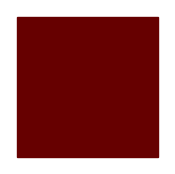

In [24]:
import matplotlib.pyplot as plt

# Define Pinotage color in RGB
pinotage_color = (102, 0, 0)  # Deep red color

# Normalize RGB values to range [0, 1]
pinotage_color_normalized = tuple(val / 255 for val in pinotage_color)

# Create a small square with Pinotage color
plt.figure(figsize=(2, 2))
plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=pinotage_color_normalized)
plt.axis('off')
plt.show()


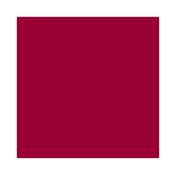

In [25]:
import matplotlib.pyplot as plt

# Define Mencía color in RGB
mencia_color = (153, 0, 51)  # Ruby red color

# Normalize RGB values to range [0, 1]
mencia_color_normalized = tuple(val / 255 for val in mencia_color)

# Create a small square with Mencía color
plt.figure(figsize=(2, 2))
plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=mencia_color_normalized)
plt.axis('off')
plt.show()


In [26]:
# import matplotlib.pyplot as plt

# # Define Schiava color in RGB
# schiava_color = (204, 102, 102)  # Light ruby red color

# # Normalize RGB values to range [0, 1]
# schiava_color_normalized = tuple(val / 255 for val in schiava_color)

# # Create a small square with Schiava color
# plt.figure(figsize=(2, 2))
# plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=schiava_color_normalized)
# plt.axis('off')
# plt.show()


# Pickling the model file for deployment

In [27]:
import pickle

In [28]:
pickle.dump(dtc,open('taste.pkl','wb'))

In [29]:
pickled_model_taste=pickle.load(open('taste.pkl','rb'))

In [30]:
##Prediction
pickled_model_taste.predict(X_test)

array(['Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'Sour', 'Sour', 'Sour', 'SemiSweet', 'Sour', 'Sour',
       'Sour', 'Sour', 'Sour', 'SemiSweet', 'Sour', 'SemiSweet',
       'SemiSweet', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'SemiSweet',
       'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'SemiSweet',
       'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'SemiSweet', 'SemiSweet', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'Sour', 'SemiSweet', 'Sour', 'Sour', 'Sour', 'Sour',
       'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour', 'Sour',
       'SemiSweet', 'Sour', 'Sour